# Exploring OpenAg Flavor Data
Notebook by Jim Arnold

## Introduction

Flavor compounds in our food are the result of complex processes. 

I found this interesting data from OpenAg and wanted to see what I can suss out. 

## Prepare Data

In [3]:
# Standard DS stack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# set plot defaults
sns.set(context='poster', style='white')

## Import data

After looking through the files manually, I made the following assumptions:

'Master List of Data Files.csv' contains info about all the samples run

Each sample has it's own file, named by the run date + sample name. 
The data is from GCMS, and only contains named compounds. 

20160501OB-UV-2.xlsx contains the consolidated data from all samples, but the samples are named by the last 3 symbols.

Based on this, to make combining the sample info and gcms data, I created a new column in the 'Master List' file called 'Sample' containing the last 3 symbols from the Profile ID column. I also added a column called 'Condition' which describes the experimental condition for that sample.

I saved this new file as 'MasterList.csv'

In [42]:
# Load data
samples = pd.read_csv('MasterList.csv')
gcms = pd.read_csv('20160501OB-UV-2 .csv')

In [43]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
Experiment ID          38 non-null object
Profile ID             38 non-null object
Sample                 24 non-null object
Condition              24 non-null object
Data Type              38 non-null object
Sample Weight (g)      38 non-null float64
Dry Matter fraction    12 non-null float64
Main effect 1          38 non-null object
Level 1                38 non-null object
Main Effect 2          38 non-null object
Level 2                38 non-null object
replicate              38 non-null int64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.6+ KB


I didn't name the samples with only 1 replicate, hence the reason "Sample" only has 24 values.
There's also a lot of missing data from Dry Matter Fraction. I'm just going to drop those

In [44]:
samples.drop(columns='Dry Matter fraction', inplace=True)
samples.dropna(inplace=True)
samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 11 columns):
Experiment ID        24 non-null object
Profile ID           24 non-null object
Sample               24 non-null object
Condition            24 non-null object
Data Type            24 non-null object
Sample Weight (g)    24 non-null float64
Main effect 1        24 non-null object
Level 1              24 non-null object
Main Effect 2        24 non-null object
Level 2              24 non-null object
replicate            24 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 2.2+ KB


In [45]:
gcms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 26 columns):
Compound    36 non-null object
RT          36 non-null float64
PS3         23 non-null float64
PS2         27 non-null float64
PS1         30 non-null float64
PL2         30 non-null float64
PL3         31 non-null float64
PL1         29 non-null float64
PC3         31 non-null float64
PC2         31 non-null float64
PC1         34 non-null float64
IL3         33 non-null float64
IL2         33 non-null float64
IL1         32 non-null float64
IC3         30 non-null float64
IC2         30 non-null float64
IC1         31 non-null float64
FS3         24 non-null float64
FS2         28 non-null float64
FS1         28 non-null float64
FL3         34 non-null float64
FL2         34 non-null float64
FL1         35 non-null float64
FC3         29 non-null float64
FC2         31 non-null float64
FC1         36 non-null int64
dtypes: float64(24), int64(1), object(1)
memory usage: 7.4+ KB


There are 36 compounds, but a lot of missingness. 

I'm going to drop the RT column, I don't really need that for now.

Then, I'm going to rearrange this df with samples in rows and  metabolites as features. 

Then, I can join the sample data, and do some group-specific imputation.

In [46]:
# drop RT and transpose with compound col as header
gcms.drop(columns='RT', inplace=True)
gcms2 = gcms.set_index('Compound').T

In [47]:
gcms2.reset_index(inplace=True)
gcms2.head()

Compound,index,Eucalyptol,Ocimene,gamma-terpinene,terpinolene,linalool,camphor,endo-borneol,terpinen-4-ol,alpha-terpineol,...,Germacrene D,bicyclogermacrene,alpha-bulnesene,gamma-cadinene,delta-cadinene,sesquiterpene b,alpha-cadinene,nerolidol,epicubenol,tau-cadinol
0,PS3,52300052.0,2881315.0,NaN,NaN,361447857.0,NaN,11250812.0,NaN,11088816.0,...,16325114.0,8579294.0,10825971.0,21564312.0,3377933.0,NaN,NaN,NaN,3210044.0,27766978.0
1,PS2,81463692.0,8057887.0,NaN,2469043.0,409560648.0,NaN,11555830.0,NaN,10909962.0,...,26450735.0,14308968.0,22819277.0,32038260.0,4430419.0,1671351.0,NaN,NaN,3240994.0,27520471.0
2,PS1,75081453.0,7967479.0,NaN,2249647.0,381749433.0,NaN,9743837.0,NaN,9023300.0,...,37734877.0,20374598.0,34351367.0,45795918.0,6276079.0,2675716.0,2105035.0,NaN,3607835.0,29374942.0
3,PL2,203707039.0,30369251.0,NaN,5559693.0,670861775.0,1918269.0,16977665.0,2294519.0,18765072.0,...,30471444.0,21277721.0,32845522.0,40756070.0,6730039.0,2180539.0,1687582.0,NaN,5386858.0,41361288.0
4,PL3,226323124.0,37553659.0,2685900.0,6067999.0,667306163.0,2029260.0,17160815.0,3008448.0,22878690.0,...,33908926.0,22494739.0,30329455.0,43669715.0,6480840.0,2365728.0,1690241.0,NaN,4901826.0,38519842.0


In [48]:
# rename samples
gcms2.rename(columns={'index': 'Sample'}, inplace=True)
gcms2.head()

Compound,Sample,Eucalyptol,Ocimene,gamma-terpinene,terpinolene,linalool,camphor,endo-borneol,terpinen-4-ol,alpha-terpineol,...,Germacrene D,bicyclogermacrene,alpha-bulnesene,gamma-cadinene,delta-cadinene,sesquiterpene b,alpha-cadinene,nerolidol,epicubenol,tau-cadinol
0,PS3,52300052.0,2881315.0,NaN,NaN,361447857.0,NaN,11250812.0,NaN,11088816.0,...,16325114.0,8579294.0,10825971.0,21564312.0,3377933.0,NaN,NaN,NaN,3210044.0,27766978.0
1,PS2,81463692.0,8057887.0,NaN,2469043.0,409560648.0,NaN,11555830.0,NaN,10909962.0,...,26450735.0,14308968.0,22819277.0,32038260.0,4430419.0,1671351.0,NaN,NaN,3240994.0,27520471.0
2,PS1,75081453.0,7967479.0,NaN,2249647.0,381749433.0,NaN,9743837.0,NaN,9023300.0,...,37734877.0,20374598.0,34351367.0,45795918.0,6276079.0,2675716.0,2105035.0,NaN,3607835.0,29374942.0
3,PL2,203707039.0,30369251.0,NaN,5559693.0,670861775.0,1918269.0,16977665.0,2294519.0,18765072.0,...,30471444.0,21277721.0,32845522.0,40756070.0,6730039.0,2180539.0,1687582.0,NaN,5386858.0,41361288.0
4,PL3,226323124.0,37553659.0,2685900.0,6067999.0,667306163.0,2029260.0,17160815.0,3008448.0,22878690.0,...,33908926.0,22494739.0,30329455.0,43669715.0,6480840.0,2365728.0,1690241.0,NaN,4901826.0,38519842.0


In [49]:
# now, I join samples and gcms2 on Samples col
df = pd.merge(gcms2, samples, how='left', on='Sample')
df.head()

,Sample,Eucalyptol,Ocimene,gamma-terpinene,terpinolene,linalool,camphor,endo-borneol,terpinen-4-ol,alpha-terpineol,...,Experiment ID,Profile ID,Condition,Data Type,Sample Weight (g),Main effect 1,Level 1,Main Effect 2,Level 2,replicate
0,PS3,52300052.0,2881315.0,NaN,NaN,361447857.0,NaN,11250812.0,NaN,11088816.0,...,20160501OB-UV-2,20160501OB-UV-2-PS3,PS,Volatiles,0.91,Light Type,Phillips,UV photoperiod,short,3
1,PS2,81463692.0,8057887.0,NaN,2469043.0,409560648.0,NaN,11555830.0,NaN,10909962.0,...,20160501OB-UV-2,20160501OB-UV-2-PS2,PS,Volatiles,1.06,Light Type,Phillips,UV photoperiod,short,2
2,PS1,75081453.0,7967479.0,NaN,2249647.0,381749433.0,NaN,9743837.0,NaN,9023300.0,...,20160501OB-UV-2,20160501OB-UV-2-PS1,PS,Volatiles,0.91,Light Type,Phillips,UV photoperiod,short,1
3,PL2,203707039.0,30369251.0,NaN,5559693.0,670861775.0,1918269.0,16977665.0,2294519.0,18765072.0,...,20160501OB-UV-2,20160501OB-UV-2-PL2,PL,Volatiles,1.28,Light Type,Phillips,UV photoperiod,long,2
4,PL3,226323124.0,37553659.0,2685900.0,6067999.0,667306163.0,2029260.0,17160815.0,3008448.0,22878690.0,...,20160501OB-UV-2,20160501OB-UV-2-PL3,PL,Volatiles,1.07,Light Type,Phillips,UV photoperiod,long,3


## EDA

In [50]:
# check missingness
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 47 columns):
Sample                       24 non-null object
Eucalyptol                   24 non-null float64
Ocimene                      24 non-null float64
gamma-terpinene              9 non-null float64
terpinolene                  22 non-null float64
linalool                     24 non-null float64
camphor                      19 non-null float64
endo-borneol                 24 non-null float64
terpinen-4-ol                16 non-null float64
alpha-terpineol              24 non-null float64
octyl acetate                12 non-null float64
chavicol                     11 non-null float64
bornyl acetate               24 non-null float64
gamma-elemene                24 non-null float64
alpha-cubebene               5 non-null float64
eugenol                      24 non-null float64
alpha-copaene                23 non-null float64
beta-elemene                 20 non-null float64
sesquiterpene a   

Simplest thing to do would be to drop compounds with missingness, but I think that might miss some, condition-specific features. 

First, let's see what this even looks like.

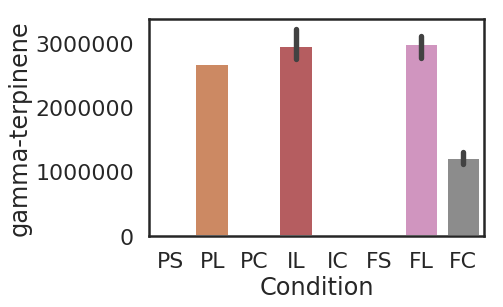

In [51]:
# plot gamma-terpinene by experimental condition group
# it's only present in 9 samples, so the missingness might be informative.
sns.barplot(x='Condition', y='gamma-terpinene', data=df)

First guess - this metabolite is present in all the 'long' coniditions, might be a product that is only formed during long exposure? the lower FC is interesting as well.

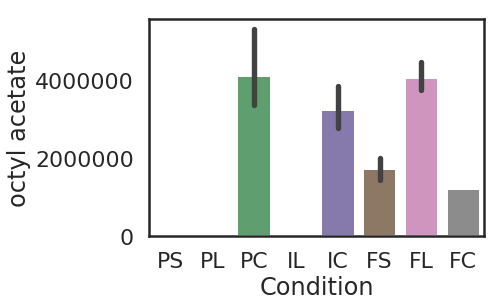

In [54]:
# next, I want to see octyl acetate
# it's only present in 12 samples, is it group specific?
sns.barplot(x='Condition', y='octyl acetate', data=df)

Seems pretty dispersed, not clear how to interpret this one.

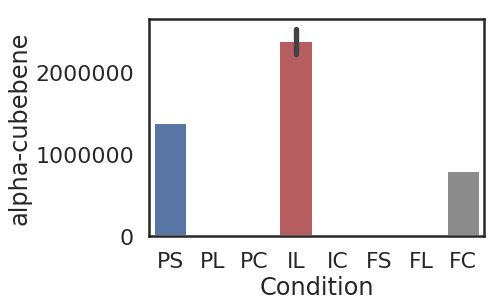

In [55]:
# I'm going to look at some others, just to get a sense of missingness
sns.barplot(x='Condition', y='alpha-cubebene', data=df)

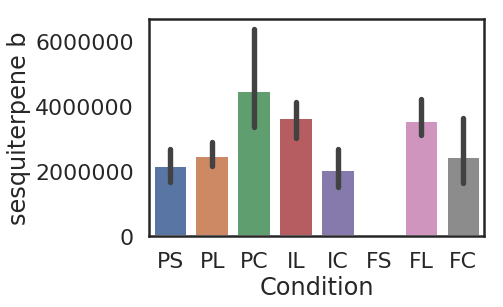

In [56]:
# I'm going to look at some others, just to get a sense of missingness
sns.barplot(x='Condition', y='sesquiterpene b', data=df)

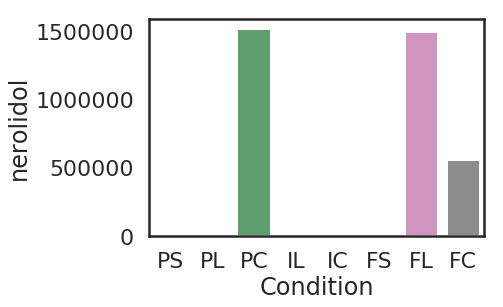

In [57]:
sns.barplot(x='Condition', y='nerolidol', data=df)

OK, based on these, I'm going to drop any metabolite with >30% missiningness (8) from all samples, and then apply a KNN imputation on the remaining missing features. 

In [147]:
# drop cols below threshold
df.dropna(axis=1, thresh=16, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 41 columns):
Sample                       24 non-null object
Eucalyptol                   24 non-null float64
Ocimene                      24 non-null float64
terpinolene                  22 non-null float64
linalool                     24 non-null float64
camphor                      19 non-null float64
endo-borneol                 24 non-null float64
terpinen-4-ol                16 non-null float64
alpha-terpineol              24 non-null float64
bornyl acetate               24 non-null float64
gamma-elemene                24 non-null float64
eugenol                      24 non-null float64
alpha-copaene                23 non-null float64
beta-elemene                 20 non-null float64
sesquiterpene a              24 non-null float64
methyleugenol                24 non-null float64
beta-ylangene                24 non-null float64
cis-alpha-bergamotene        24 non-null float64
alpha-copaene   

In [94]:
# scale features and impute with KNN

from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN

X = df.loc[:, 'Eucalyptol':'tau-cadinol'].values
labels = df.loc[:, 'Sample']
groups = df.loc[:, 'Condition']

# scale
X_scaled = StandardScaler().fit_transform(X)
# impute
X_impute = KNN(k=3).fit_transform(X_scaled)

Imputing row 1/24 with 7 missing, elapsed time: 0.001


In [88]:
# dfs for ref

# pre-scale
df2 = pd.DataFrame(
    X, columns=df.loc[:, 'Eucalyptol':'tau-cadinol'].columns, index=df.loc[:, 'Sample'])
# pre-impute
df3 = pd.DataFrame(
    X_scaled, columns=df.loc[:, 'Eucalyptol':'tau-cadinol'].columns, index=df.loc[:, 'Sample'])
# post-impute
df4 = pd.DataFrame(
    X_impute, columns=df.loc[:, 'Eucalyptol':'tau-cadinol'].columns, index=df.loc[:, 'Sample'])

In [86]:
df2.head()

,Eucalyptol,Ocimene,terpinolene,linalool,camphor,endo-borneol,terpinen-4-ol,alpha-terpineol,bornyl acetate,gamma-elemene,...,"cis-muurola-4(15),5-diene",Germacrene D,bicyclogermacrene,alpha-bulnesene,gamma-cadinene,delta-cadinene,sesquiterpene b,alpha-cadinene,epicubenol,tau-cadinol
Sample,,,,,,,,,,,,,,,,,,,,,
PS3,-1.750224,-1.416763,-0.894809,-0.768057,-0.714788,0.035761,-0.736091,-0.918166,-1.557072,-1.356848,...,-1.257611,-1.294327,-1.421635,-1.408240,-1.269921,-1.156020,-1.170980,-0.551385,-0.781391,-0.623420
PS2,-1.300772,-0.969796,-0.790824,-0.480320,-0.348925,0.079825,-1.027921,-0.940286,-1.401888,-0.733133,...,-0.683634,-0.547468,-0.772412,-0.461832,-0.632501,-0.720687,-1.200625,-0.488536,-0.765178,-0.642260
PS1,-1.399131,-0.977603,-0.887655,-0.646644,-0.426858,-0.181942,-1.210572,-1.173615,-1.273608,-0.036556,...,0.002955,0.284842,-0.085122,0.448181,0.204757,0.042721,-0.304045,-0.224924,-0.573006,-0.500526
PL2,0.583166,0.956657,0.573235,1.082384,-0.984681,0.863082,-0.432126,0.031182,0.151077,-0.097997,...,-0.036176,-0.250904,0.017210,0.329352,-0.101956,0.230490,-0.746081,-0.916146,0.358947,0.415565
PL3,0.931711,1.576988,0.797575,1.061119,-0.929966,0.889541,0.423209,0.539926,-0.108934,0.099592,...,0.102596,0.002642,0.155109,0.130806,0.075361,0.127415,-0.580766,-0.911743,0.104860,0.198399


## Analysis/Modeling

With data prep done, let's try modeling this data.

First, let's see what we've got

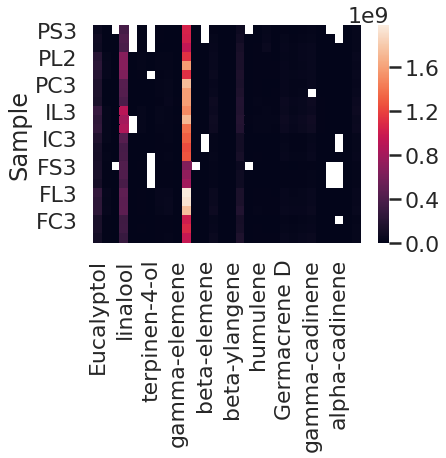

In [89]:
# pre-scale ref
sns.heatmap(df2)

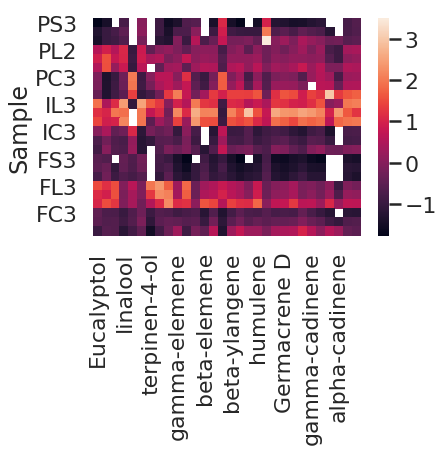

In [90]:
# pre-impute ref
sns.heatmap(df3)

(array([ 0.5,  3.5,  6.5,  9.5, 12.5, 15.5, 18.5, 21.5]),
 <a list of 8 Text yticklabel objects>)

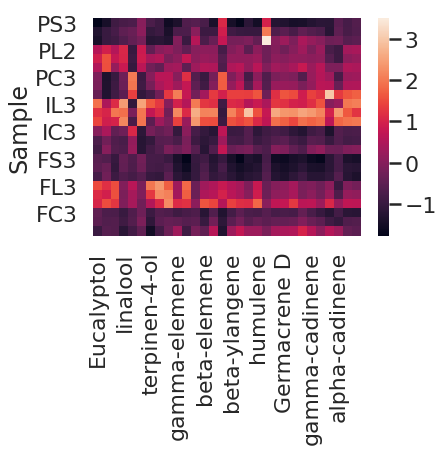

In [141]:
# post-impute ref
sns.heatmap(df4)
plt.yticks(rotation=0)

(array([-2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

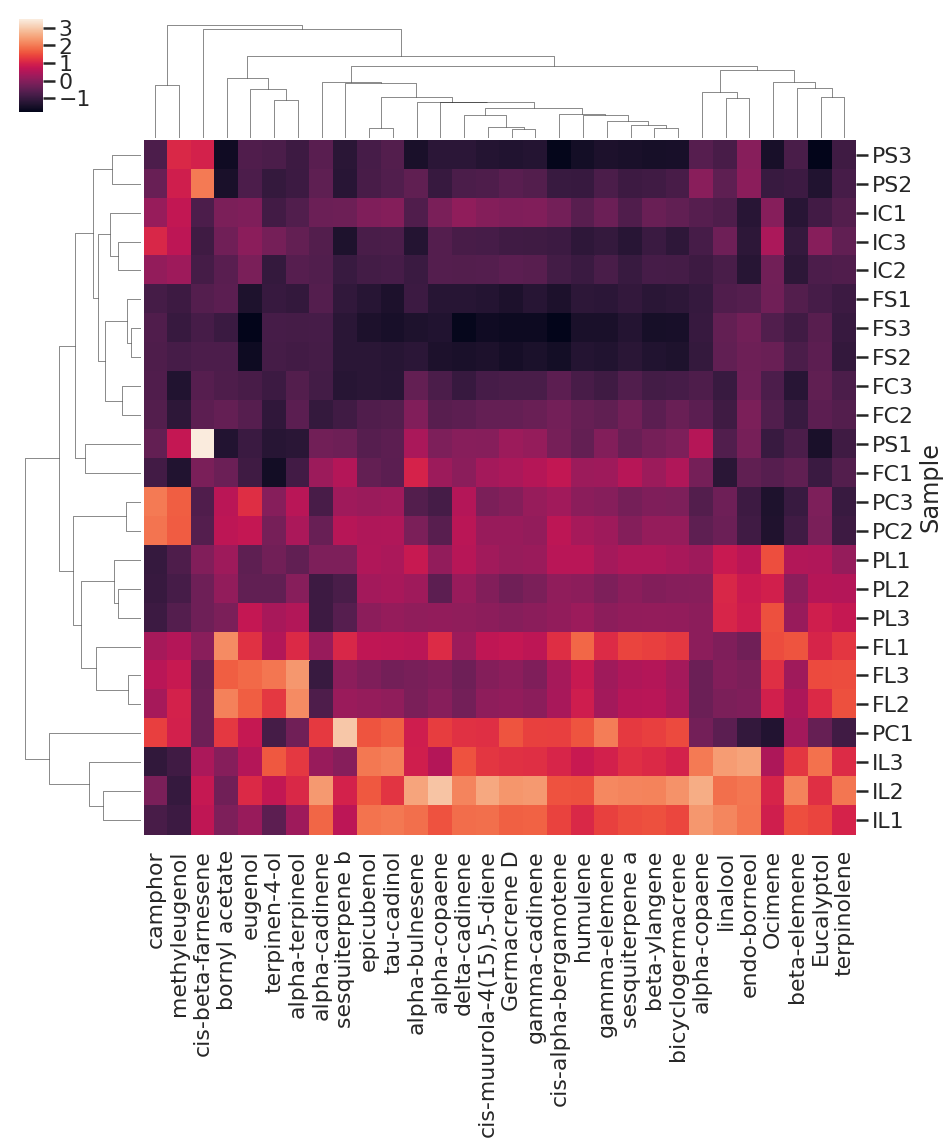

In [146]:
# post-impute ref
plt.figure()
sns.clustermap(df4, figsize=(15, 15))
plt.yticks(rotation=0)

I should combine these into 1 figure... to do.

Looking at the last figure, it seems like length of time is most important for compound development.

For now, scaling and imputation look reasonable. I'm going to apply PCA to see if there's any patterns in the underlying conditions.

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_impute)
print(pca.explained_variance_ratio_)

[0.6504784  0.1281135  0.10611135]


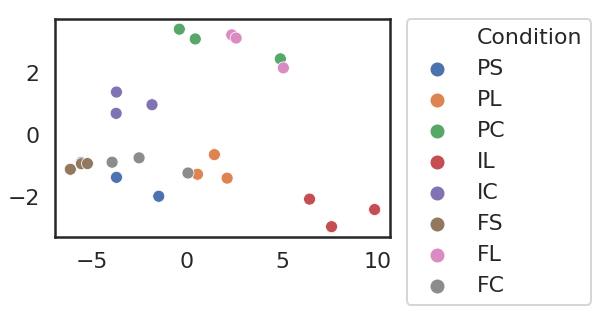

In [114]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.loc[:, 'Condition'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

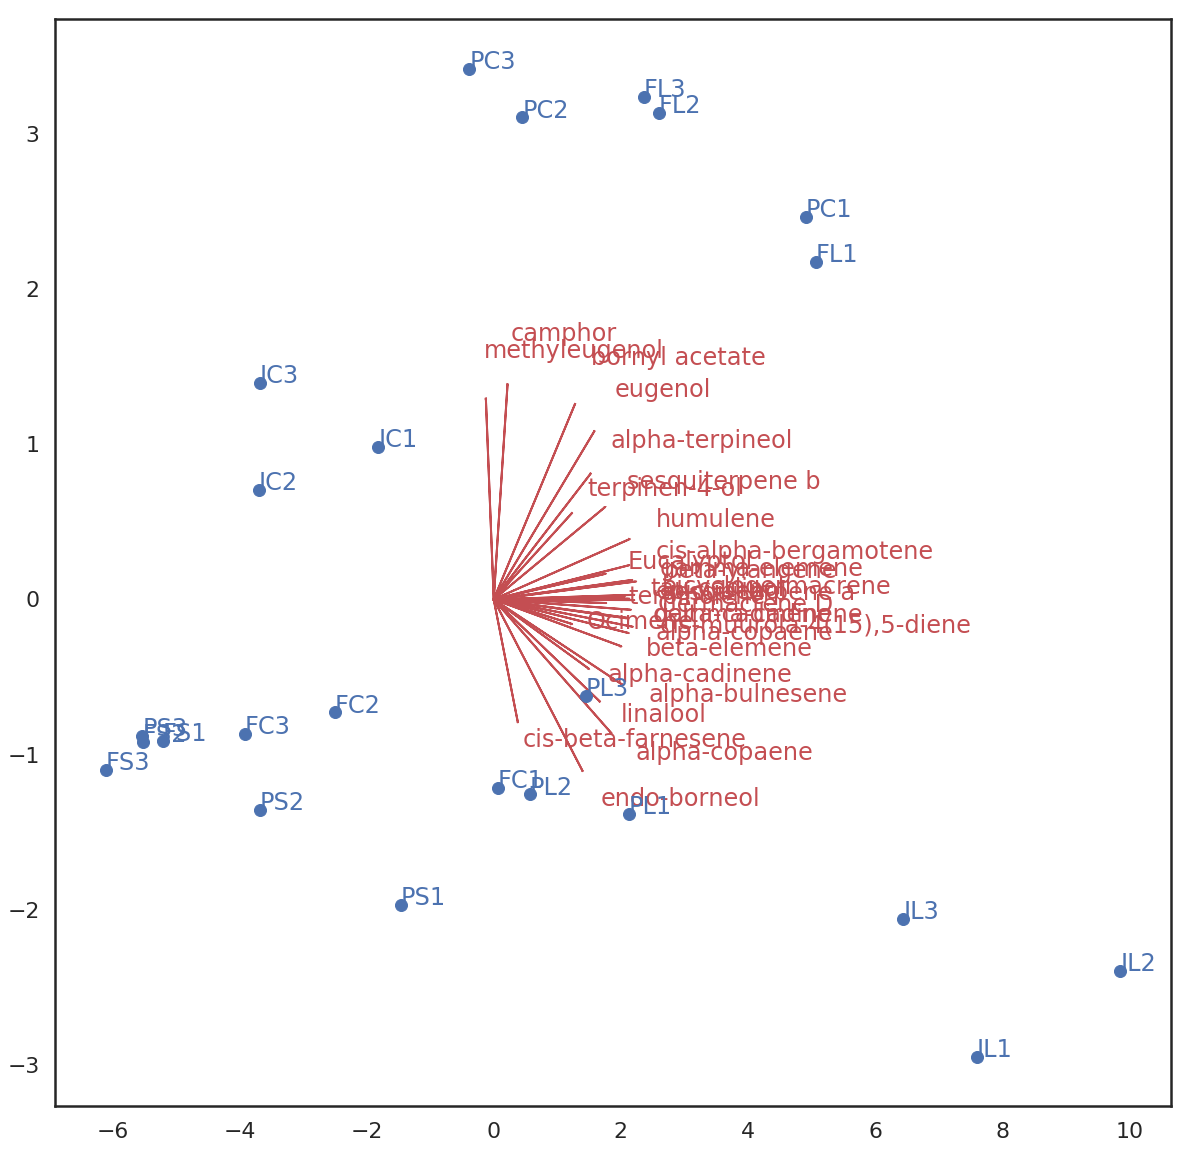

In [128]:
# try plotting biplot - from https://github.com/teddyroland/python-biplot/blob/master/biplot.py
xvector = pca.components_[0]  # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]
xs = pca.transform(df4)[:, 0]  # see 'prcomp(my_data)$x' in R
ys = pca.transform(df4)[:, 1]

plt.figure(figsize=(20, 20))

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df4.columns.values)[i], color='r')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i], ys[i], list(df4.index)[i], color='b')

plt.show()

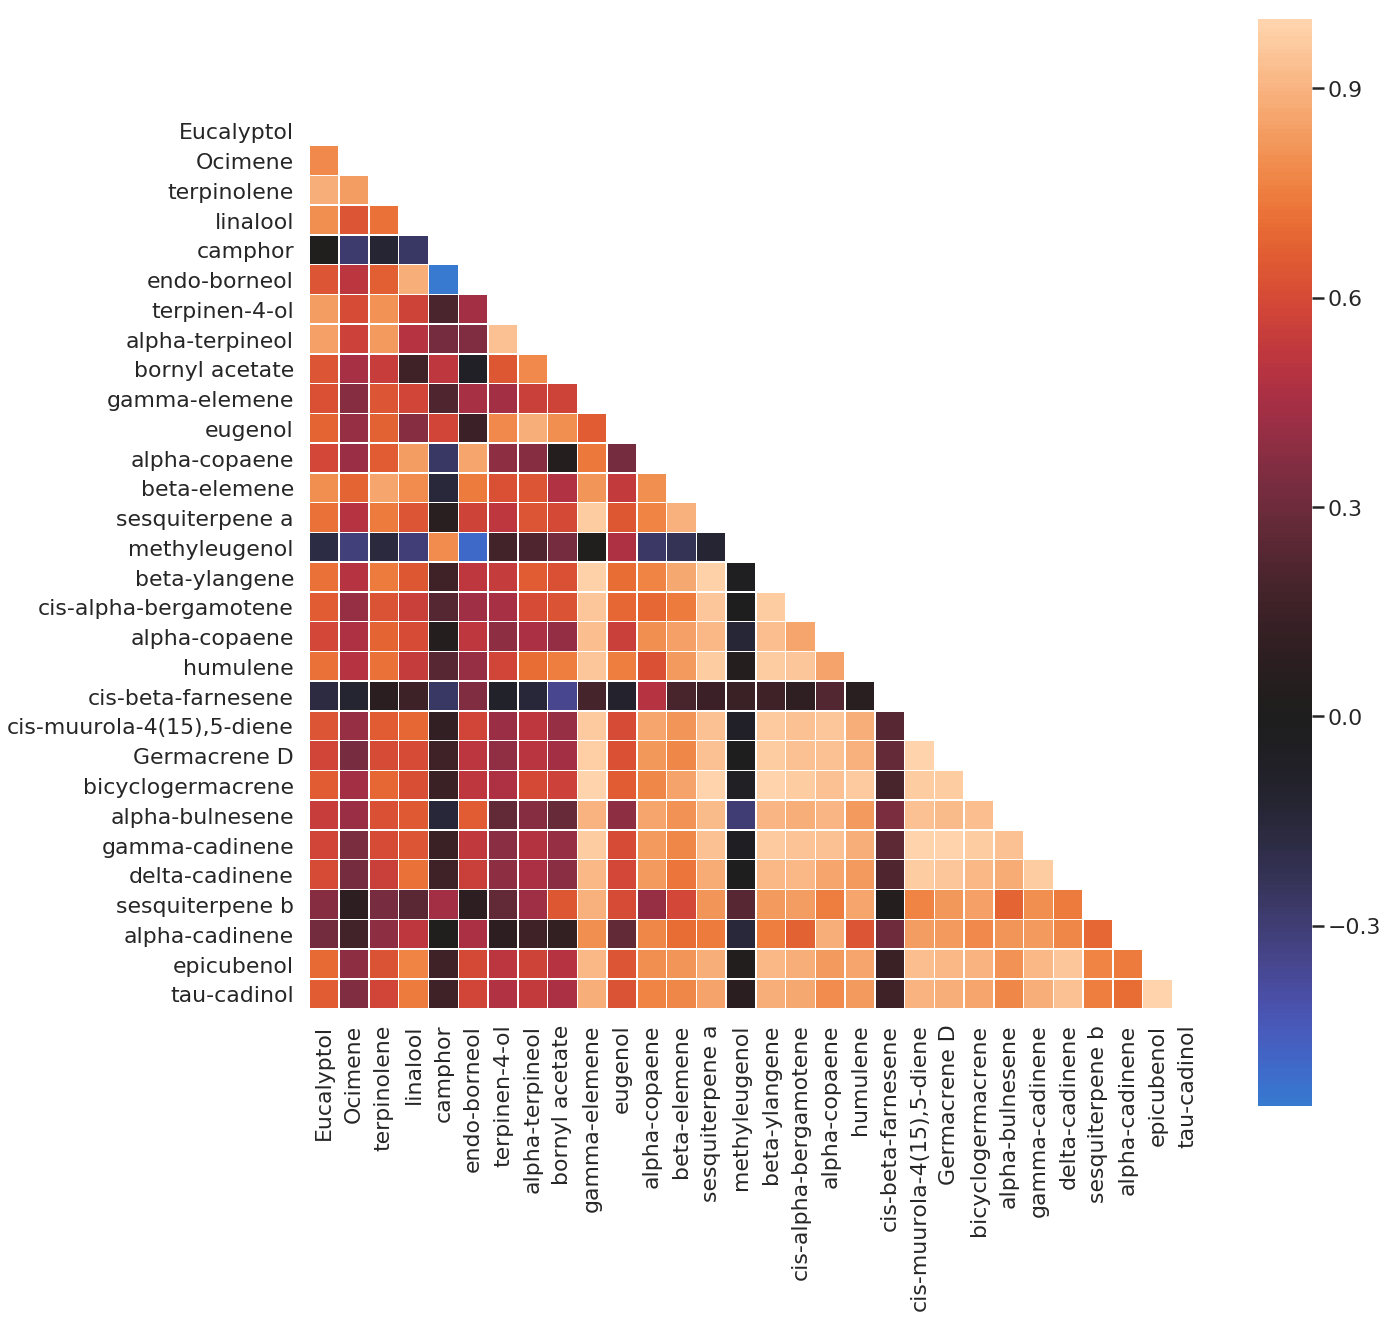

In [136]:
# Compute the correlation matrix
corr = df4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

Looks like a lot of the compounds are correlated. That makes sense, given the heatmap above. 

It seems like the length of time maturing is a good predictor of flavor, but just to be sure, let's model it. 

From the biplot above, it looks like many of the compounds are captured in PC1. Therefore, let's try to model PC1 using the available experimental features. 

I'll do that in the next book.